# Import Relevent Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

# Importing and Prepare Data

In [2]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df1 = df.copy()
df1.rename(columns={'R&D Spend':'RD', 'Administration':'Admin', 'Marketing Spend':'Mkt'}, inplace=True)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RD      50 non-null     float64
 1   Admin   50 non-null     float64
 2   Mkt     50 non-null     float64
 3   State   50 non-null     object 
 4   Profit  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
# conversion of obj to category
df1['State'] = df1['State'].astype('category')

# columns data types
df1.dtypes

RD         float64
Admin      float64
Mkt        float64
State     category
Profit     float64
dtype: object

In [6]:
# check for Duplicate rows
df1[df1.duplicated()]

,RD,Admin,Mkt,State,Profit


In [7]:
# numerical and Categorical variables
numerical_var = ['RD', 'Admin', 'Mkt', 'Profit']
categorical_var = ['State']

In [8]:
# descriptive Statistics
df1[numerical_var].describe()

,RD,Admin,Mkt,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
df1[categorical_var].value_counts()

State     
California    17
New York      17
Florida       16
Name: count, dtype: int64

In [10]:
# State wise average Profit 
avg_profit_statewise = df1.groupby(categorical_var)['Profit'].mean().reset_index()
avg_profit_statewise

/var/folders/d7/624qzhlx7051pksqzldlx5fh0000gn/T/ipykernel_51940/664243412.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_profit_statewise = df1.groupby(categorical_var)['Profit'].mean().reset_index()


,State,Profit
0,California,103905.175294
1,Florida,118774.024375
2,New York,113756.446471


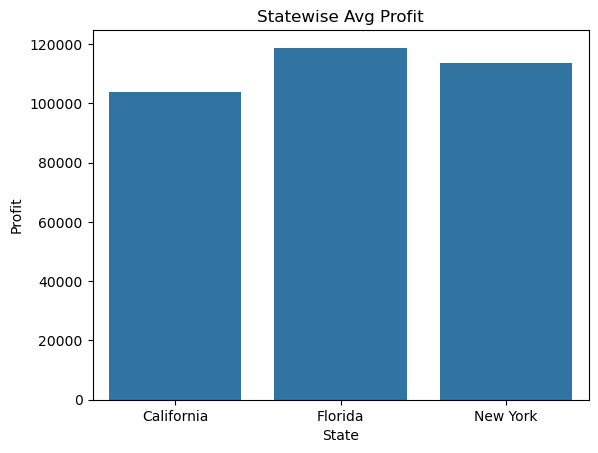

In [11]:
sns.barplot(data=avg_profit_statewise, x='State',y='Profit')
plt.xlabel('State')
plt.ylabel('Profit')
plt.title('Statewise Avg Profit')
plt.show()

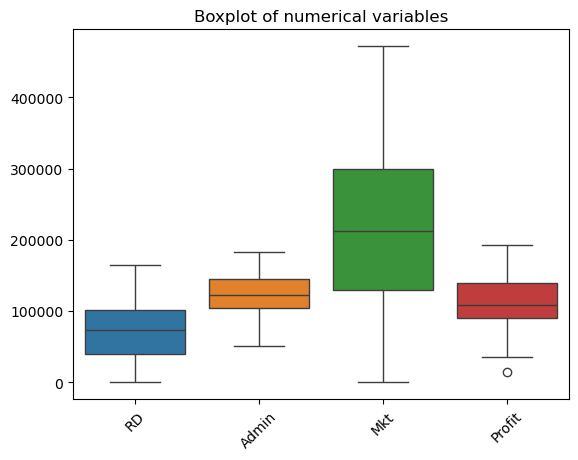

In [12]:
#Outlier Detection
num_var = ['RD', 'Admin', 'Mkt', 'Profit']

# Box plot for numerical variables
sns.boxplot(data=df1[num_var])
plt.title('Boxplot of numerical variables')
plt.xticks(rotation=45)
plt.show()

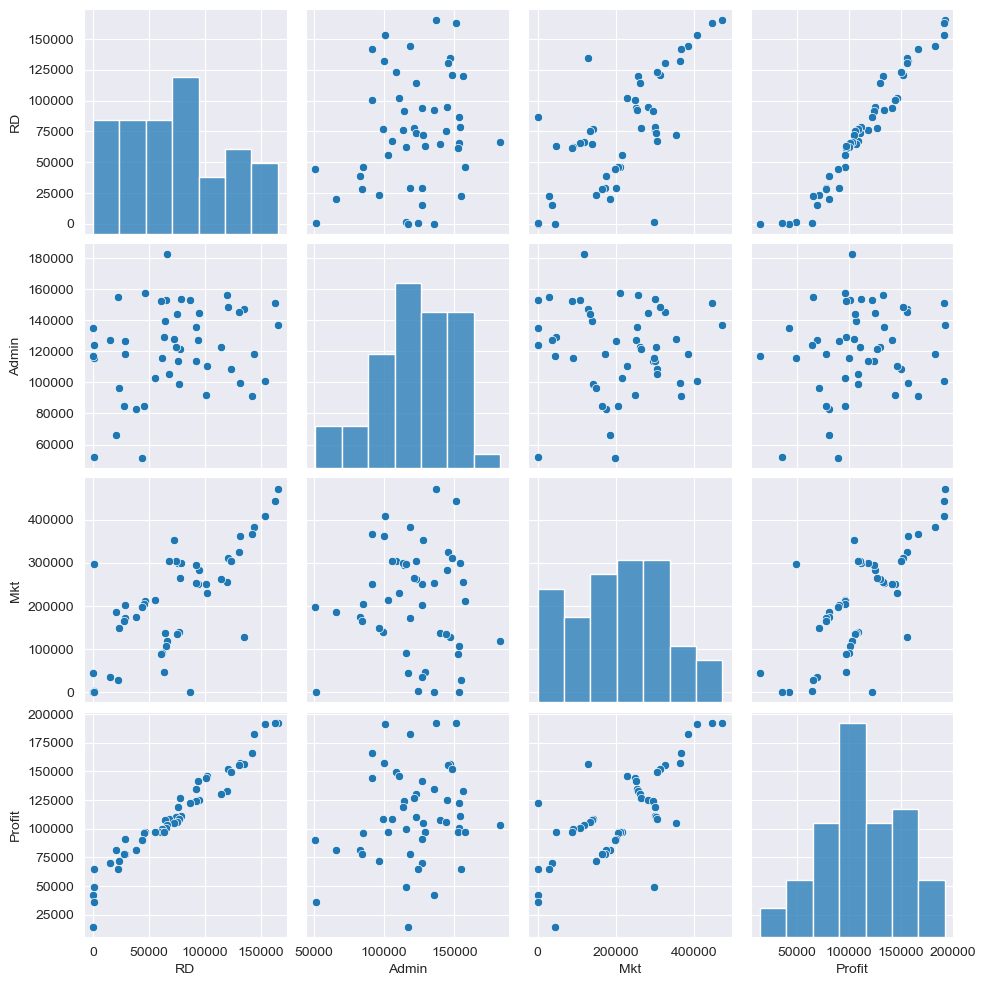

In [13]:
# Scatter plot for numerical variables
sns.set_style(style='darkgrid')
sns.pairplot(df1)
plt.show()

In [ ]:
# Scatter plot for numerical variables
sns.set_style(style='darkgrid')
sns.pairplot(df)
plt.show()

In [ ]:
# Outliers
sns.boxplot(df[numerical_var])
plt.show()

# Correlation

In [14]:
correlation_matrix = df1[numerical_var].corr()
correlation_matrix

,RD,Admin,Mkt,Profit
RD,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
Mkt,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


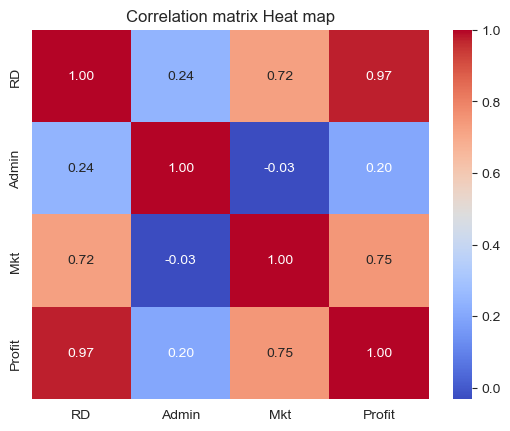

In [15]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix Heat map')
plt.show()

# Fitting SLR Models to Assess the Predictive Power of Individual Predictors

In [16]:
num_var = ['RD', 'Admin', 'Mkt']
results = pd.DataFrame(columns=['Exp_var', 'Intercept', 'Coefficient', 'R2_Score'])

# Loop through each predictor variable in num_var
for X in num_var:

    # Fit linear regression model
    model = smf.ols(f'Profit ~ {X}', data=df1)
    model_result = model.fit()
    
    # Store the results in the DataFrame
    results = pd.concat([results, pd.DataFrame({
        'Exp_var': [X],
        'Intercept': [model_result.params.iloc[0]],
        'Coefficient': [model_result.params.iloc[1]],
        'R2_Score': [model_result.rsquared],
        'P_Value': [model_result.pvalues[X]]
    })], ignore_index=True)
# print results
print(results)

  Exp_var     Intercept  Coefficient  R2_Score       P_Value
0      RD  49032.899141     0.854291  0.946535  3.500322e-32
1   Admin  76974.471305     0.288749  0.040287  1.622174e-01
2     Mkt  60003.548816     0.246459  0.559154  4.381073e-10


/var/folders/d7/624qzhlx7051pksqzldlx5fh0000gn/T/ipykernel_51940/3254927968.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({


##### From above Results:

#####   - R&D spend has a significant positive effect on profit (p-value < 0.05) and explains a large portion of the variance in profit (R- squared = 0.947).
#####   - Administration spend does not appear to have a significant effect on profit (p-value > 0.05) and explains very little variance in profit (R-squared = 0.040).
#####   - Marketing spend has a significant positive effect on profit (p-value < 0.05) and explains a moderate portion of the variance in profit (R-squared = 0.559).

# Fitting MRM

In [17]:
# Without Admin variable
MRM = smf.ols(f'Profit~RD+Mkt', data=df1).fit()
MRM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           2.16e-31
Time:                        12:25:52   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RD             0.7966      0.041     19.266      0.000       0.713       0.880
Mkt            0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# With Admin variable
MRM1 = smf.ols(f'Profit~RD+Admin+Mkt', data=df1).fit()
MRM1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           4.53e-30
Time:                        12:26:17   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
Mkt            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### - The model explains approximately 95.1% of the variance in the dependent variable (Profit), indicating a strong fit.
##### - The F-statistic probability is very small (4.53e-30), indicating that the overall model is statistically significant.
##### - Administration spending (Admin) has a coefficient of -0.0268, indicating a negligible negative effect on Profit, but the coefficient is not statistically significant.
##### - Marketing spending (Mkt) has a coefficient of 0.0272, indicating a positive effect on Profit, but the coefficient is not statistically significant.

# Model Validation Techniques

## Calculating VIF

In [20]:
rsq_RD = smf.ols(f'RD~Admin+Mkt',data=df1).fit().rsquared  
vif_RD = 1/(1-rsq_RD) 

rsq_Mkt = smf.ols(f'Mkt~Admin+RD',data=df1).fit().rsquared  
vif_Mkt = 1/(1-rsq_Mkt)

rsq_Admin = smf.ols(f'Admin~Mkt+RD',data=df1).fit().rsquared  
vif_Admin = 1/(1-rsq_Admin)


# Storing vif values in a data frame
d1 = {'Variables':['RD','Admin','Mkt'],'VIF':[vif_RD,vif_Admin,vif_Mkt]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RD,2.468903
1,Admin,1.175091
2,Mkt,2.326773


## Residual Analysis

#### To calculate RMSE Value

In [21]:
df2 = pd.DataFrame()

In [22]:
df2['Prediction'] = MRM1.fittedvalues.copy()
df2['Observed'] = df1["Profit"].values.copy()
df2['resid'] = df2['Observed']-df2['Prediction']
df2.head()

,Prediction,Observed,resid
0,192521.252890,192261.83,-259.422890
1,189156.768232,191792.06,2635.291768
2,182147.279096,191050.39,8903.110904
3,173696.700026,182901.99,9205.289974
4,172139.514183,166187.94,-5951.574183


In [23]:
df2['resid2'] = df2['resid']*df2['resid']
RMSE_MRM1 = np.sqrt(sum(list(df2['resid2'])) / df2.shape[0])

In [24]:
RMSE_MRM1

8855.34448901514

### Test for Normality of Residuals (Q-Q Plot)

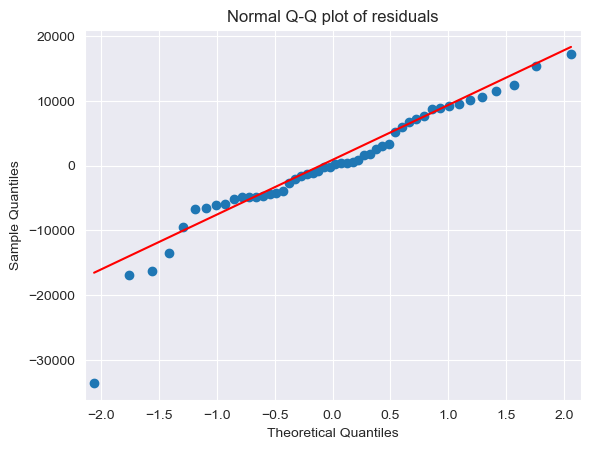

In [25]:
sm.qqplot(MRM1.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [47]:
list(np.where(MRM1.resid<-10000))

[array([14, 15, 48, 49])]

### Residual Plot for Homoscedasticity

In [39]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

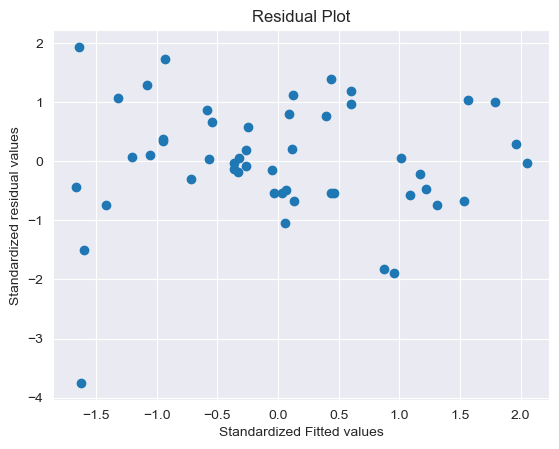

In [40]:
plt.scatter(get_standardized_values(MRM1.fittedvalues),
            get_standardized_values(MRM1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

### Residual Vs Regressors

/Users/bhargav/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)


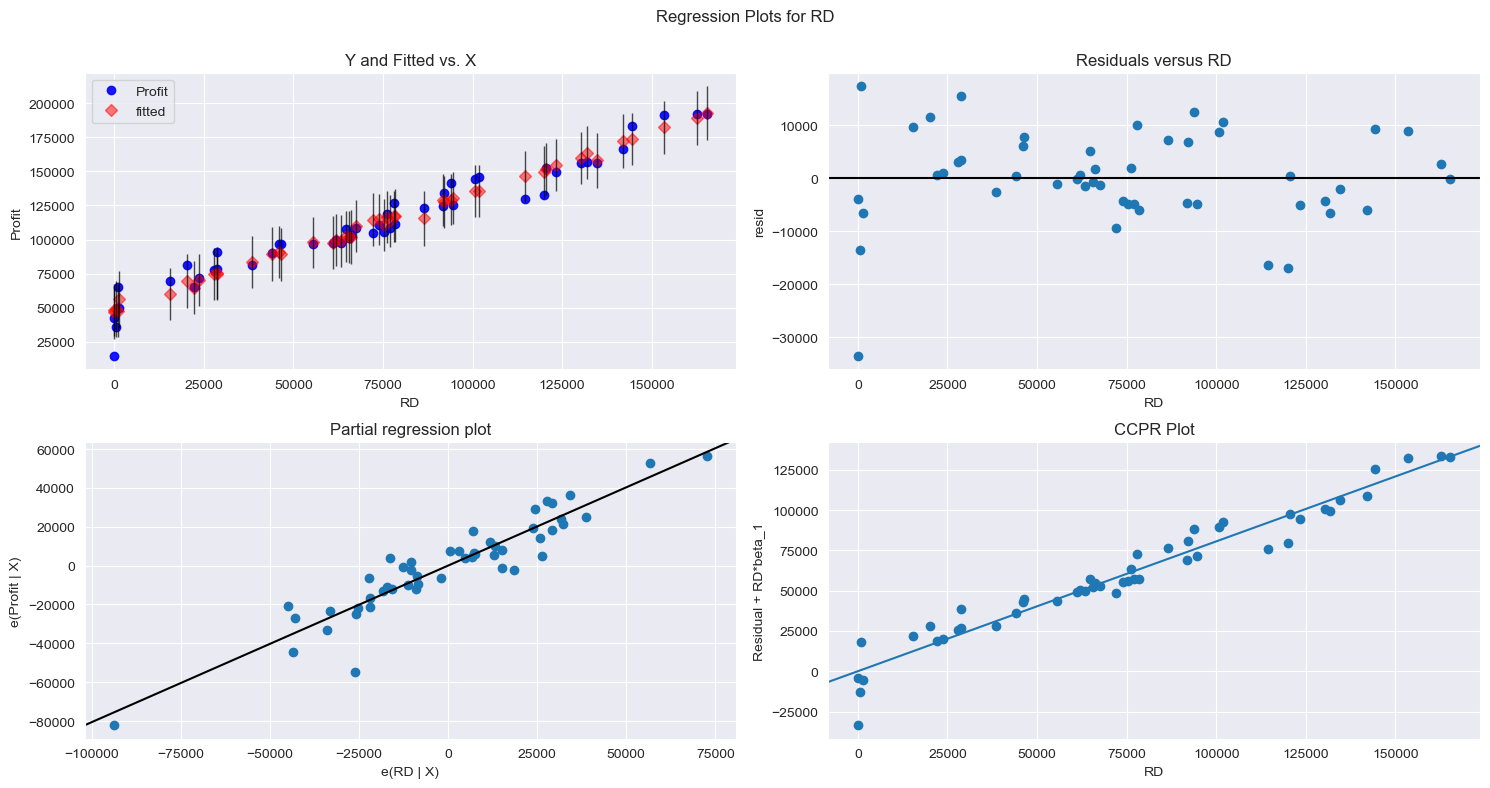

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(MRM1, "RD", fig=fig)
plt.show()

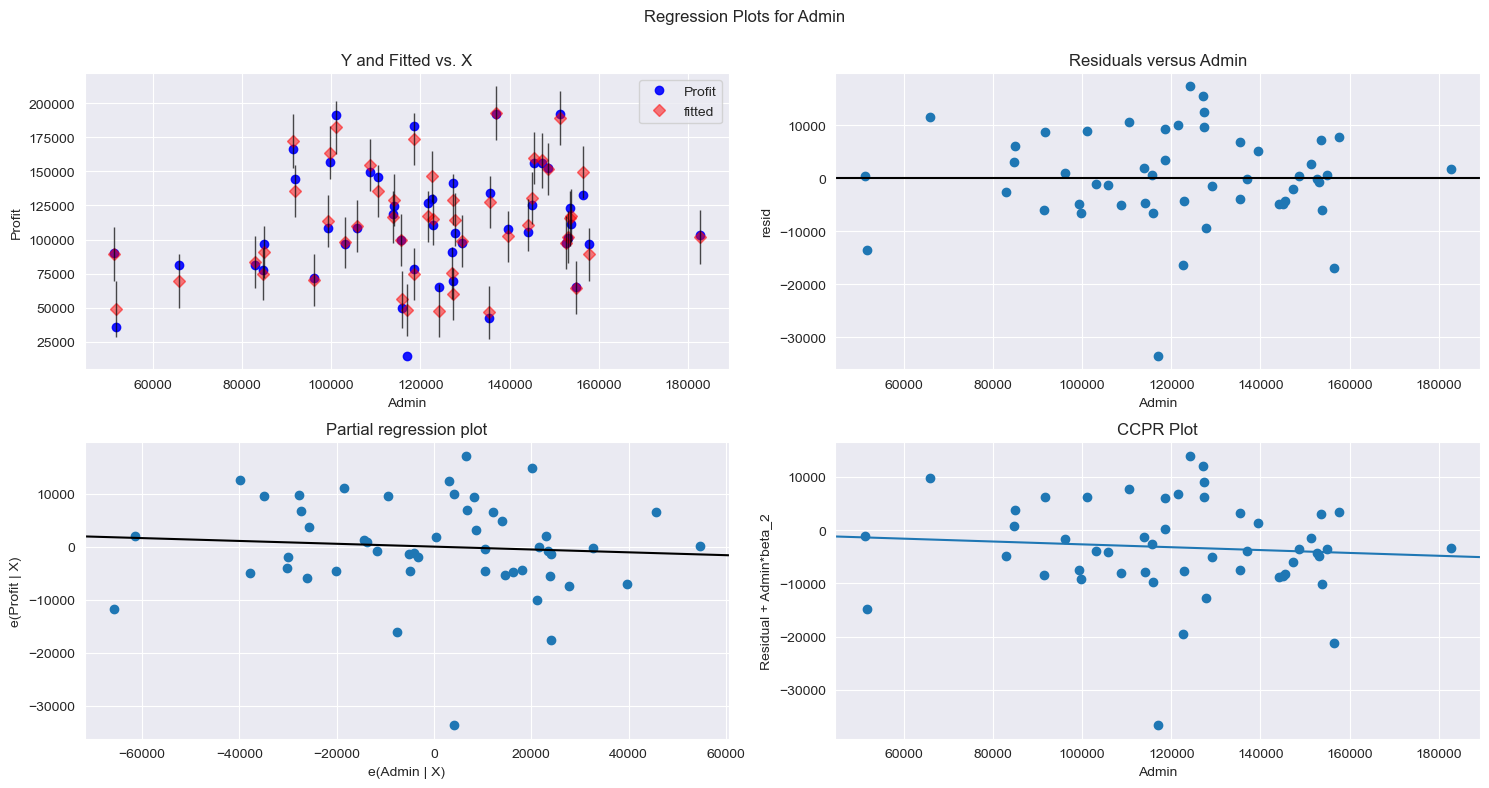

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(MRM1, "Admin", fig=fig)
plt.show()

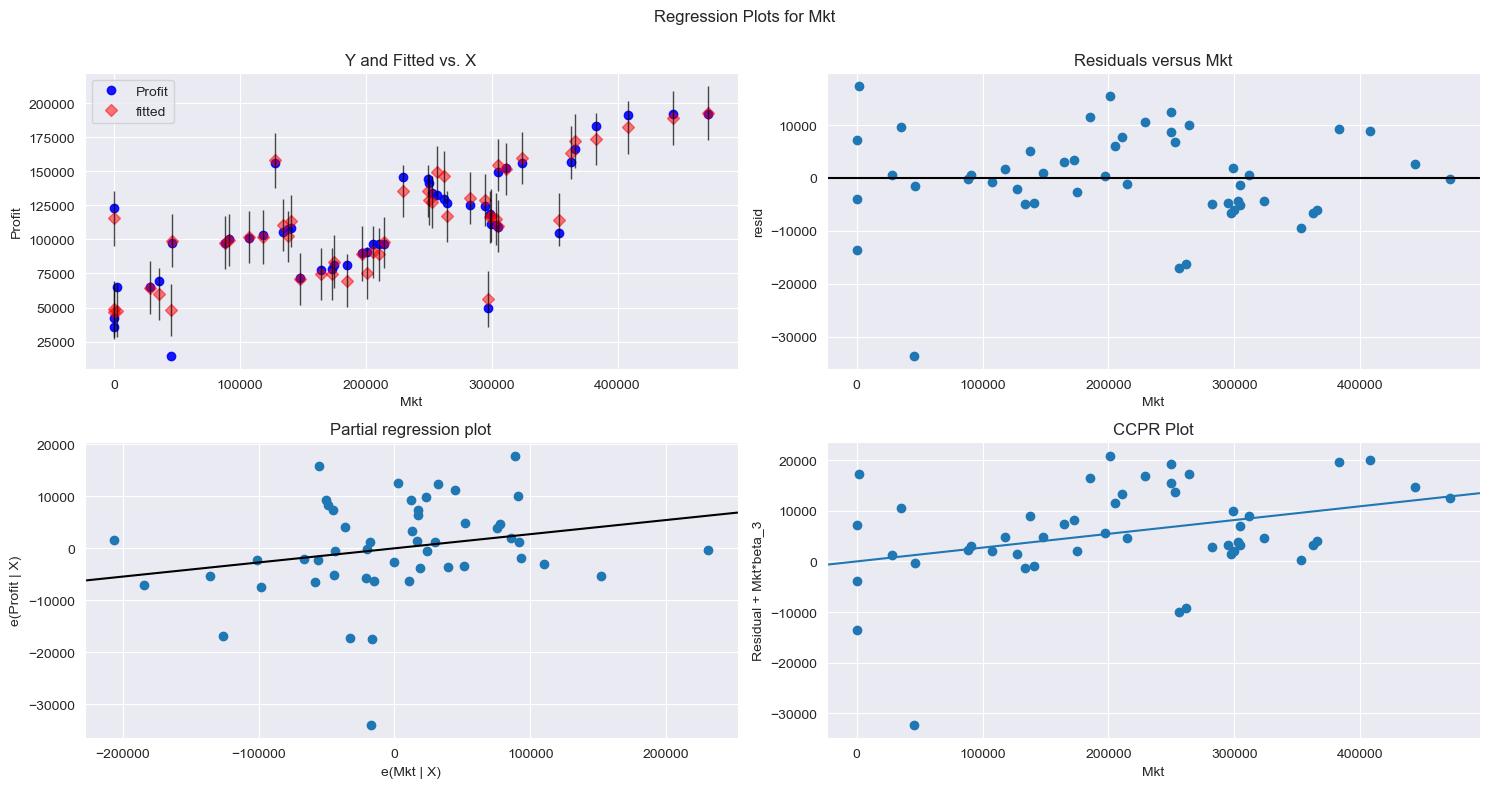

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(MRM1, "Mkt", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Finding Influencers/Outliers

In [30]:
model_influence = MRM1.get_influence()
(c, _) = model_influence.cooks_distance

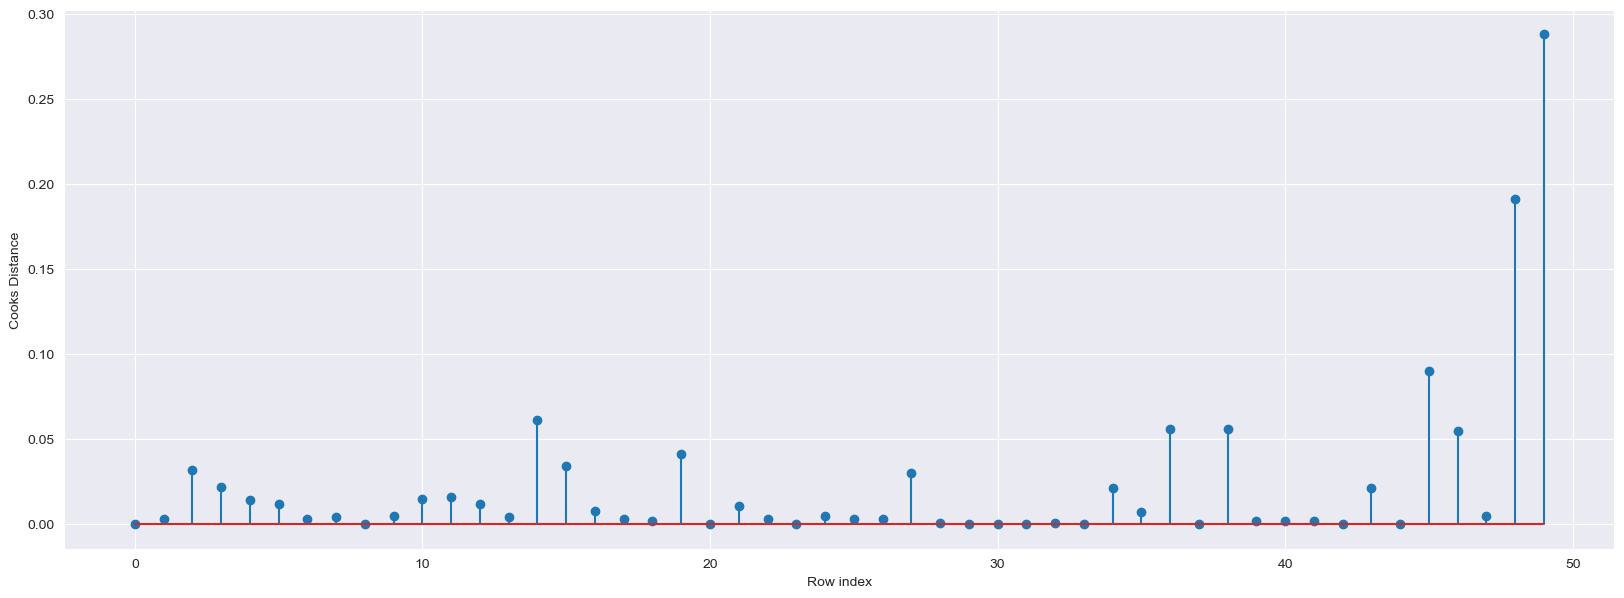

In [31]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [32]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543264)

## High Influence points

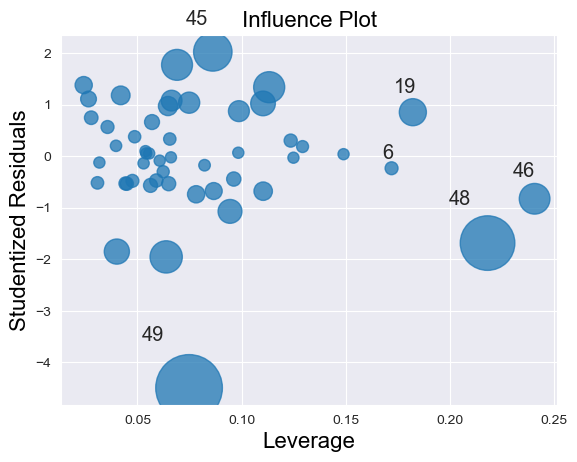

In [33]:
influence_plot(MRM1)
plt.show()

In [34]:
k = df1.shape[1]  # Number of predictors (features)
n = df1.shape[0]  # Number of observations

leverage_cutoff = 3 * ((k + 1) / n)
print("Leverage Cutoff:", leverage_cutoff)

Leverage Cutoff: 0.36


#### from above Influence plot, it's clear that data point 49 exhibits high influence on the regression model.

In [48]:
# removal of influence Data Point
df1[df1.index.isin([49])]

,RD,Admin,Mkt,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [36]:
df3=df1.drop(df1.index[[49]], axis=0).reset_index(drop=True)

In [37]:
df3.tail()

,RD,Admin,Mkt,State,Profit
44,22177.74,154806.14,28334.72,California,65200.33
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41


# Building a new model

In [40]:
MRM2 = smf.ols(f'Profit~RD+Admin+Mkt', data=df3).fit()
MRM2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           8.85e-32
Time:                        12:28:54   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RD             0.7830      0.038     20.470      0.000       0.706       0.860
Admin         -0.0222      0.043     -0.518      0.607      -0.109       0.064
Mkt            0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Residuals :

In [41]:
df4 = pd.DataFrame()

In [42]:
df4['Prediction'] = MRM2.fittedvalues.copy()
df4['Observed'] = df3["Profit"].values.copy()
df4['resid'] = df4['Observed']-df4['Prediction']
df4.head()

,Prediction,Observed,resid
0,190716.676999,192261.83,1545.153001
1,187537.122227,191792.06,4254.937773
2,180575.526396,191050.39,10474.863604
3,172461.144642,182901.99,10440.845358
4,170863.486721,166187.94,-4675.546721


In [43]:
df4['resid2'] = df4['resid']*df4['resid']
RMSE_MRM2 = np.sqrt(sum(list(df4['resid2'])) / df4.shape[0])

In [44]:
RMSE_MRM2

7430.589093678351

In [45]:
print("RMSE for Model 1 (MRM1):", RMSE_MRM1)
print("RMSE for Model 2 (MRM2):", RMSE_MRM2)

RMSE for Model 1 (MRM1): 8855.34448901514
RMSE for Model 2 (MRM2): 7430.589093678351


#### The lower the RMSE, the better the model's performance in terms of prediction accuracy. In this case, Model 2 (with RMSE of 7430) has a lower RMSE compared to Model 1 (with RMSE of 8855), indicating that Model 2 performs better in predicting profit based on the given dataset.